<a href="https://colab.research.google.com/github/harshitha2469/Kidney-Stone-Detection-from-Abdominal-Ultrasound-Images/blob/main/iprml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [9]:
data=pd.read_csv('/content/kidney-stone-dataset.csv')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data.shape

(90, 8)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [13]:
data.columns

Index(['Unnamed: 0', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc',
       'target'],
      dtype='object')

In [14]:
data.isnull()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()

,0
Unnamed: 0,0
gravity,0
ph,0
osmo,0
cond,0
urea,0
calc,0
target,0


In [16]:
data.dropna()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...,...
85,85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [17]:
data.dropna(how='any')

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...,...
85,85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [18]:
  import matplotlib.pyplot as plt
  import seaborn as sns

In [19]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
data = data.dropna()
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(f"Training Set (x_train):\n{x_train}")
print(f"Test Set (x_test):\n{x_test}")

Training Set (x_train):
[[   5.53        775.        ]
 [   5.56394009  377.        ]
 [   6.13        364.        ]
 [   4.81        410.        ]
 [   5.93249307  538.        ]
 [   6.74178795  427.        ]
 [   5.51        408.        ]
 [   5.98        487.        ]
 [   6.81        594.        ]
 [   6.61        225.        ]
 [   6.88        395.        ]
 [   5.86        531.        ]
 [   6.27        371.        ]
 [   5.4         803.        ]
 [   6.19        956.        ]
 [   5.73        874.        ]
 [   6.52        187.        ]
 [   4.9         684.        ]
 [   6.81        947.        ]
 [   5.33        815.        ]
 [   6.37        325.        ]
 [   5.27        668.        ]
 [   7.00457192  443.        ]
 [   4.76        312.        ]
 [   4.91        725.        ]
 [   5.85        970.        ]
 [   5.87        241.        ]
 [   5.53        907.        ]
 [   5.66        702.        ]
 [   5.96        631.        ]
 [   7.01        443.        ]
 [   6.19      

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data=pd.read_csv('/content/kidney-stone-dataset.csv')
print(data.info())
print(data.columns)
data = data.dropna()
numerical_cols = data.select_dtypes(include=np.number).columns
print(f"Numerical Columns: {numerical_cols}")
x = data.loc[:,numerical_cols].values
y = data.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(f"Training Set (x_train):\n{x_train}")
print(f"Test Set (x_test):\n{x_test}")
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB
None
Index(['Unnamed: 0', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc',
       'target'],
      dtype='object')
Numerical Columns: Index(['Unnamed: 0', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc',
       'target'],
      dtype='object')
Training Set (x_train):
[[4.80000000e+01 1.02100000e+00 5.53000000e+00 7.75000000e+02
  3.12000000e+01 3.02000000e+02 6.19000000e+00 1.00000000e+00]
 [8.00000000e+01 1.01977069e+00 5.56394009e+0

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [24]:
from sklearn.linear_model import LinearRegression
data_set = pd.read_csv('/content/kidney-stone-dataset.csv')
data_set = data_set.dropna()

In [25]:
x = data_set.iloc[:, [2, 3]].values
y = data_set.iloc[:, 4].values

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
# Displaying the output for the training and test sets
print(f"Training Set (x_train):\n{x_train}")
print(f"Test Set (x_test):\n{x_test}")

Training Set (x_train):
[[   5.53        775.        ]
 [   5.56394009  377.        ]
 [   6.13        364.        ]
 [   4.81        410.        ]
 [   5.93249307  538.        ]
 [   6.74178795  427.        ]
 [   5.51        408.        ]
 [   5.98        487.        ]
 [   6.81        594.        ]
 [   6.61        225.        ]
 [   6.88        395.        ]
 [   5.86        531.        ]
 [   6.27        371.        ]
 [   5.4         803.        ]
 [   6.19        956.        ]
 [   5.73        874.        ]
 [   6.52        187.        ]
 [   4.9         684.        ]
 [   6.81        947.        ]
 [   5.33        815.        ]
 [   6.37        325.        ]
 [   5.27        668.        ]
 [   7.00457192  443.        ]
 [   4.76        312.        ]
 [   4.91        725.        ]
 [   5.85        970.        ]
 [   5.87        241.        ]
 [   5.53        907.        ]
 [   5.66        702.        ]
 [   5.96        631.        ]
 [   7.01        443.        ]
 [   6.19      

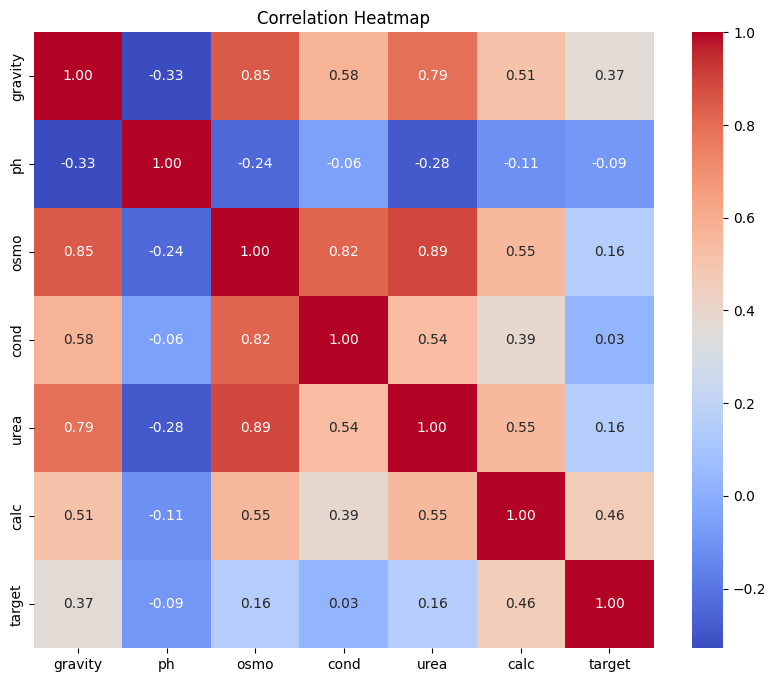

/tmp/ipython-input-27-736638311.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='pastel')


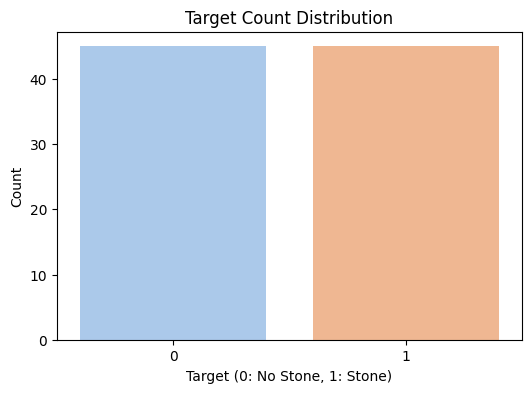

/tmp/ipython-input-27-736638311.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=data, palette='coolwarm')
/tmp/ipython-input-27-736638311.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=data, palette='coolwarm')
/tmp/ipython-input-27-736638311.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=data, palette='coolwarm')
/tmp/ipython-input-27-736638311.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

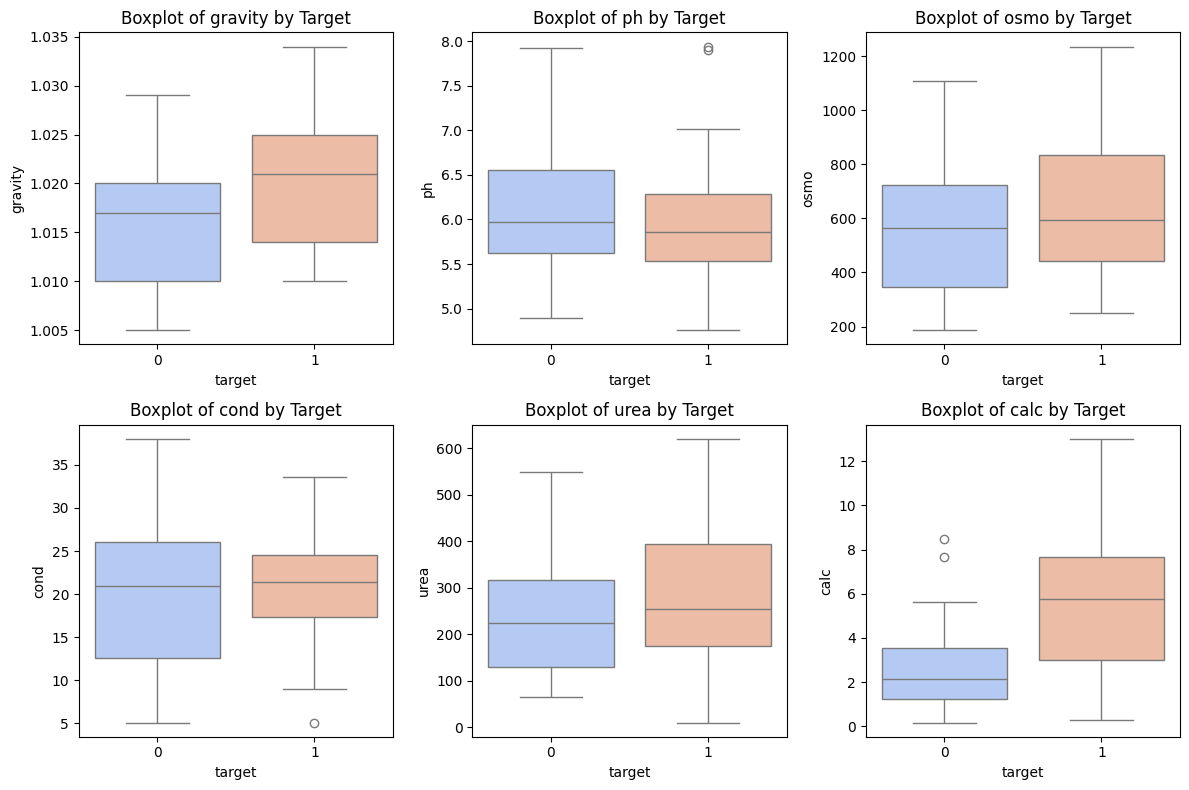

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = "//content/kidney-stone-dataset.csv"
data = pd.read_csv(file_path)
data = data.drop(columns=['Unnamed: 0'])
numeric_cols = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=numeric_cols)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette='pastel')
plt.title("Target Count Distribution")
plt.xlabel("Target (0: No Stone, 1: Stone)")
plt.ylabel("Count")
plt.show()
feature_cols = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']
plt.figure(figsize=(12, 8))
for i, col in enumerate(feature_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=col, data=data, palette='coolwarm')
    plt.title(f"Boxplot of {col} by Target")
plt.tight_layout()
plt.show()

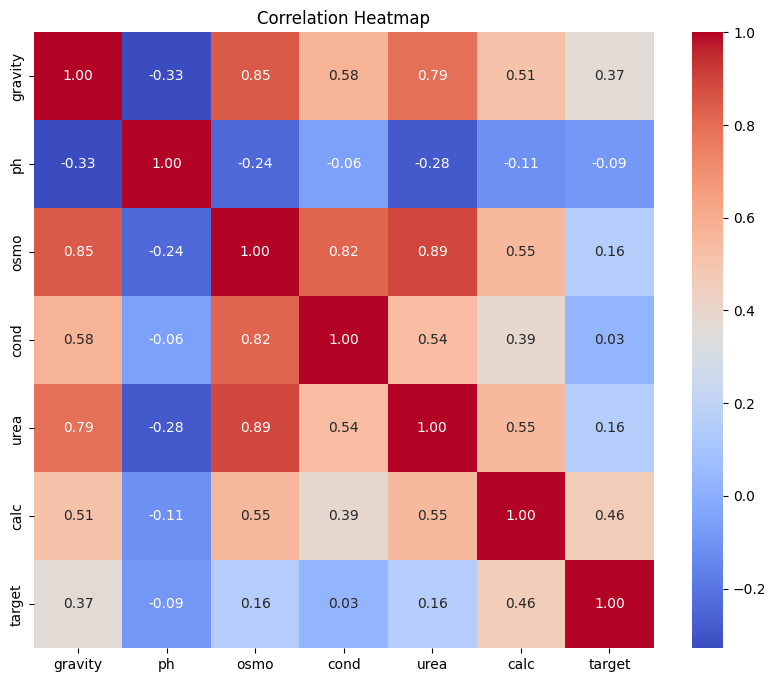

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
file_path = "/content/kidney-stone-dataset.csv"
data = pd.read_csv(file_path)
data = data.drop(columns=['Unnamed: 0'])
numeric_cols = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=numeric_cols)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


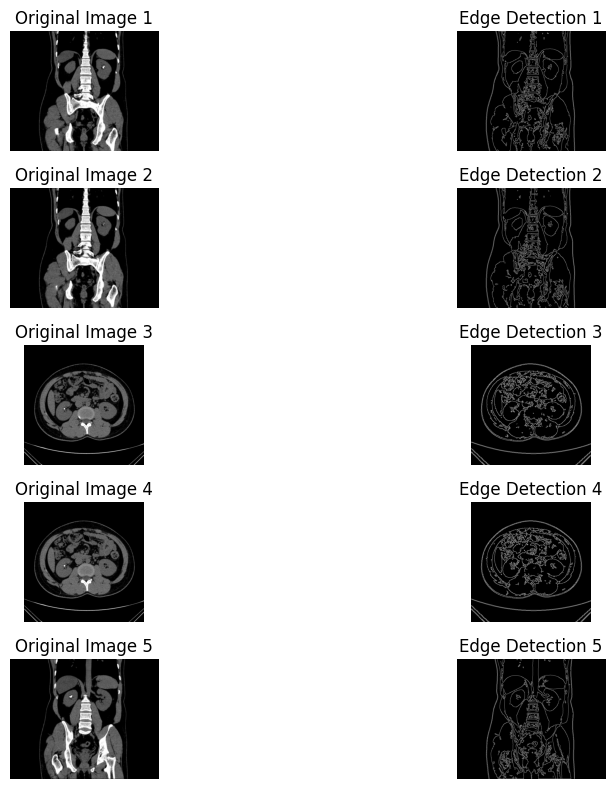

In [31]:
import cv2
import matplotlib.pyplot as plt
file_paths = [
    "/content/Stone- (994).jpg",
    "/content/Stone- (995).jpg",
    "/content/Stone- (996).jpg",
    "/content/Stone- (997).jpg",
    "/content/Stone- (998).jpg"
]
plt.figure(figsize=(12, 8))
for i, path in enumerate(file_paths):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img, 100, 200)
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Original Image {i+1}")
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Edge Detection {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
csv_file_path = '//content/kidney-stone-dataset.csv'
df = pd.read_csv(csv_file_path)
df['target'] = df['target'].apply(lambda x: eval(x) if isinstance(x, str) else x)
y_true = np.array(df["target"].tolist())
np.random.seed(42)
y_pred = np.random.randint(0, 2, size=y_true.shape)
conf_matrices = multilabel_confusion_matrix(y_true, y_pred)
label_names = df['target'].apply(pd.Series).columns
conf_matrices_dict = {label: conf_matrices[i] for i, label in enumerate(label_names)}
for label, matrix in conf_matrices_dict.items():
    print(f"Confusion Matrix for {label}:")
    print(matrix)
    print()

Confusion Matrix for 0:
[[24 21]
 [23 22]]



In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('/content/kidney-stone-dataset.csv')
X = data[['ph', 'osmo']]
y = data['target']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5555555555555556


In [34]:
from sklearn.metrics import precision_score
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

Precision: 0.5925925925925926


In [35]:
from sklearn.metrics import recall_score
y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')


Recall: 0.5555555555555556


In [36]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

F1 Score: 0.5444444444444444
